# Importing  libraries

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing train_test_split

In [52]:
from sklearn.model_selection import train_test_split

# Loading dataset

In [53]:
df = pd.read_csv("titanic_toy.csv")
df.sample(5)

,Age,Fare,Family,Survived
459,NaN,7.7500,0,0
37,21.0,8.0500,0,0
266,16.0,NaN,5,0
286,30.0,9.5000,0,1
43,3.0,41.5792,3,1


# Displaying concise information about a DataFrame

Also include the data types of columns, the number of non-null values, and memory usage.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


# Handling missing value

In [55]:
# Checking the percentage of data missing in each column

df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [56]:
# Storing all the input columns in variable 'X' and target column in variable 'y'

X = df.drop(columns=["Survived"])
y = df['Survived']

In [57]:
#  Dividing dataset into two subsets: one for training the model (X_train, y_train) and the other for testing its 
# performance (y_train, y_test), helping evaluate how well the model generalizes to new unseen data.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
# Shape of training and testing data

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [59]:
# Percentage of missing data of input columns in training dataset

X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [60]:
# As we saw above, we have missing values in column 'Age' and 'Fare', in this step we are finding mean and median of 
# column 'Age', so that we can later fill the missing value of column 'Age' with the mean and median.

mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

In [61]:
# As we saw above, we have missing values in column 'Age' and 'Fare', in this step we are finding mean and median of 
# column 'Fare', so that we can later fill the missing value of column 'Fare' with the mean and median.

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [62]:
# Filling the missing data in the 'Age' column with the calculated mean and creating a new column named 'Age_mean'.

X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

In [63]:
# Filling the missing data in the 'Age' column with the calculated median and creating a new column named 'Age_median'.

X_train['Age_median'] = X_train['Age'].fillna(median_age)

In [64]:
# Filling the missing data in the 'Fare' column with the calculated mean and creating a new column named 'Fare_mean'.

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [65]:
# Filling the missing data in the 'Fare' column with the calculated median and creating a new column named 'Fare_median'.

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [66]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
545,64.0,26.0000,0,64.000000,64.00,26.0000,26.0000
377,27.0,211.5000,2,27.000000,27.00,211.5000,211.5000
560,NaN,7.7500,0,29.785904,28.75,7.7500,7.7500
651,18.0,23.0000,1,18.000000,18.00,23.0000,23.0000
96,71.0,34.6542,0,71.000000,71.00,34.6542,34.6542


# Examing variance

In [67]:
# When using mean or median imputation to replace missing values in a dataset, this can potentially lead to a reduction 
# in the variance of the imputed dataset compared to the original dataset, which can impact downstream analyses or modeling.
# To verify this, we are calculating the variance. We check whether the variance of the imputed dataset has reduced 
# compared to the original dataset.

print("Original Age Variable variance : ", X_train['Age'].var())
print("Age variance after mean imputation: ", X_train['Age_mean'].var())
print("Age variance after median imputation: ", X_train['Age_median'].var())

print("\n")


print("Original Fare Variable variance : ", X_train['Fare'].var())
print("Fare variance after mean imputation: ", X_train['Fare_mean'].var())
print("Fare variance after median imputation: ", X_train['Fare_median'].var())

Original Age Variable variance :  204.3495133904614
Age variance after mean imputation:  161.81262452718673
Age variance after median imputation:  161.9895663346054


Original Fare Variable variance :  2448.197913706318
Fare variance after mean imputation:  2324.2385256705547
Fare variance after median imputation:  2340.0910219753637


As we observe, the variance is significantly decreasing in the age column. Therefore, we need to exercise caution when imputing missing values and carefully select the optimal strategy.

# Examining distribution

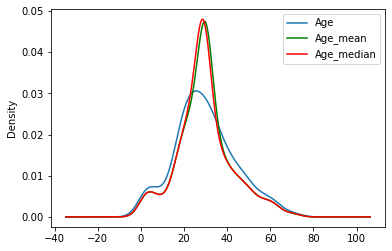

In [68]:
# Now, let's examine the distribution of the original column 'Age', the mean-imputed column, and the median-imputed column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# variable imputed with median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

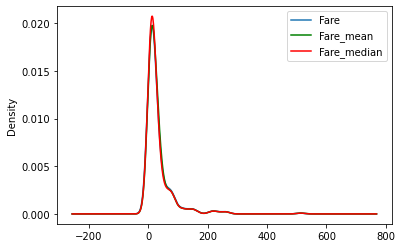

In [69]:
# Now, let's examine the distribution of the original column 'Fare', the mean-imputed column, and the median-imputed column.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# variable imputed with median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As we can see that, distribution of mean imputed age and median imputed age column is changing as compared to original age column, which shows that it is not good strategy to fill missing value of age column with mean/median. Whereas in fare column, distribution of all the columns are almost same, which shows that we can fill missing values with mean/median.

# Examining covariance

In [71]:
# We can also check covariance to determine whether the covariance of imputed columns with other columns is the same 
# as that of the original columns with other columns.

X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


Significant changes in covariance are undesirable.

# Examining correlation

In [72]:
# We can also check correlation to determine whether the correlation of imputed columns with other columns is the 
# same as that of the original columns with other columns.

X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


Since correlation values range only between -1 and 1, significant changes in correlation are also undesirable.

# Creating box plots to visualize changes between the original and imputed columns

<AxesSubplot:>

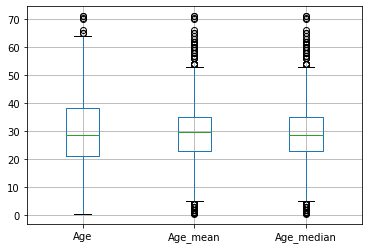

In [75]:
X_train[['Age', 'Age_mean', 'Age_median']].boxplot()

We can observe that in the mean and median imputed columns, the interquartile range has reduced, leading to an increase in outliers, which is a concerning sign.

<AxesSubplot:>

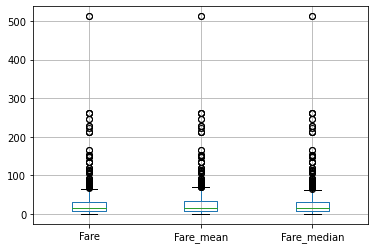

In [76]:
X_train[['Fare', 'Fare_mean', 'Fare_median']].boxplot()

We can observe that there isn't a significant difference between the original columns and the mean and median imputed columns, which is a positive indication.